# Airbnb Capstone #

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import squarify
import pyplot_themes as themes
themes.theme_solarized(scheme="dark")
%load_ext autoreload
%autoreload 2
import folium 
from folium.plugins import MarkerCluster
import matplotlib.lines as mlines
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## This data is from: http://insideairbnb.com/get-the-data.html ##

**Changing some columns into strings**

In [29]:
scheming = {
    'id':str,
    'host_id':str,
    'host_name':str,
    'latitude': str,
    'longitude':str
    }

**Reading in the data**

**Using a dataset to pull similar columns**

In [30]:
df_help = pd.read_csv('Data/April_2019.csv', delimiter= ',', converters= scheming )
df = pd.read_csv('Data/June2019.csv', delimiter= ',', converters= scheming, usecols = df_help.columns)
df1 = pd.read_csv('Data/June2020.csv', delimiter= ',', converters= scheming, usecols = df_help.columns)

**Adding Dummy Variable**

In [31]:
df['year'] = 0
df1['year'] = 1

**Cmbing the dataframes and dropping NaN values**

In [32]:
df3 = pd.concat([df, df1], axis = 0 )

In [33]:
df3.dropna(inplace = True)

**Inspecting the dataframe**

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39610 entries, 0 to 49487
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    39610 non-null  object 
 1   host_response_rate         39610 non-null  float64
 2   host_is_superhost          39610 non-null  object 
 3   host_total_listings_count  39610 non-null  float64
 4   host_identity_verified     39610 non-null  object 
 5   neighbourhood              39610 non-null  object 
 6   neighbourhood_group        39610 non-null  object 
 7   zipcode                    39610 non-null  object 
 8   latitude                   39610 non-null  object 
 9   longitude                  39610 non-null  object 
 10  property_type              39610 non-null  object 
 11  room_type                  39610 non-null  object 
 12  accommodates               39610 non-null  int64  
 13  bathrooms                  39610 non-null  flo

**Counting the listings per borough for April 2019 - April 2020**

In [35]:
count_19_df = df[['neighbourhood_group', 'neighbourhood']]
borough_count19 = count_19_df.groupby('neighbourhood_group').count().sort_values(by= 'neighbourhood').reset_index()

In [36]:
count_20_df = df1[['neighbourhood_group', 'neighbourhood']]
borough_count20 = count_20_df.groupby('neighbourhood_group').count().sort_values(by= 'neighbourhood').reset_index()

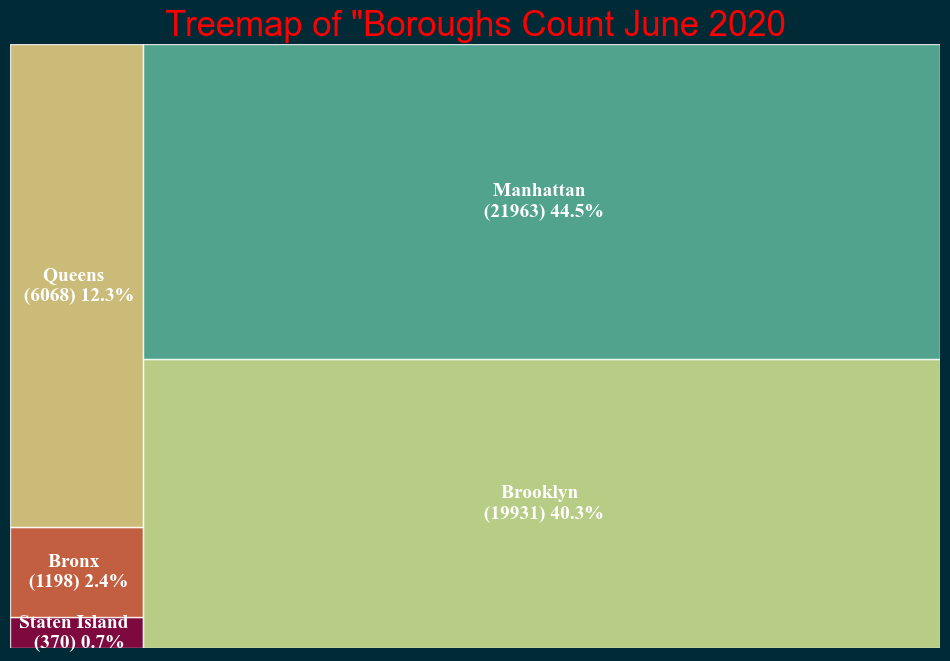

In [37]:

labels = borough_count20.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = borough_count20['neighbourhood_group'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes= [356, 1048, 5588, 20019, 21790], label=['Staten Island \n (370) 0.7%', 'Bronx \n (1198) 2.4%', 'Queens \n (6068) 12.3%', 'Brooklyn \n (19931) 40.3%', 'Manhattan \n (21963) 44.5%'], color=colors, alpha=.8, text_kwargs={'fontsize':14, 'fontname':"Times New Roman",'weight':'bold', 'color':'w'})

# Decorate
plt.title('Treemap of "Boroughs Count June 2020', size = 25, color= 'r')
plt.axis('off')
plt.show()

**Graph of Counts**

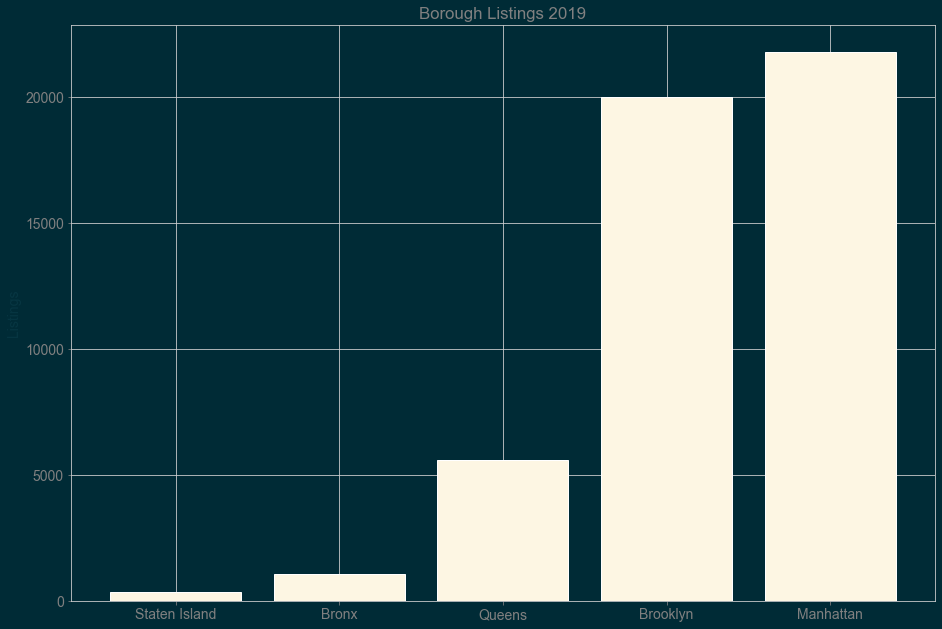

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Boroughs = ['Staten Island', 'Bronx', 'Queens', 'Brooklyn', 'Manhattan']
neighbourhood = borough_count19['neighbourhood']
ax.bar(Boroughs,neighbourhood)
ax.set_title('Borough Listings 2019')
ax.set_ylabel('Listings')
plt.show()

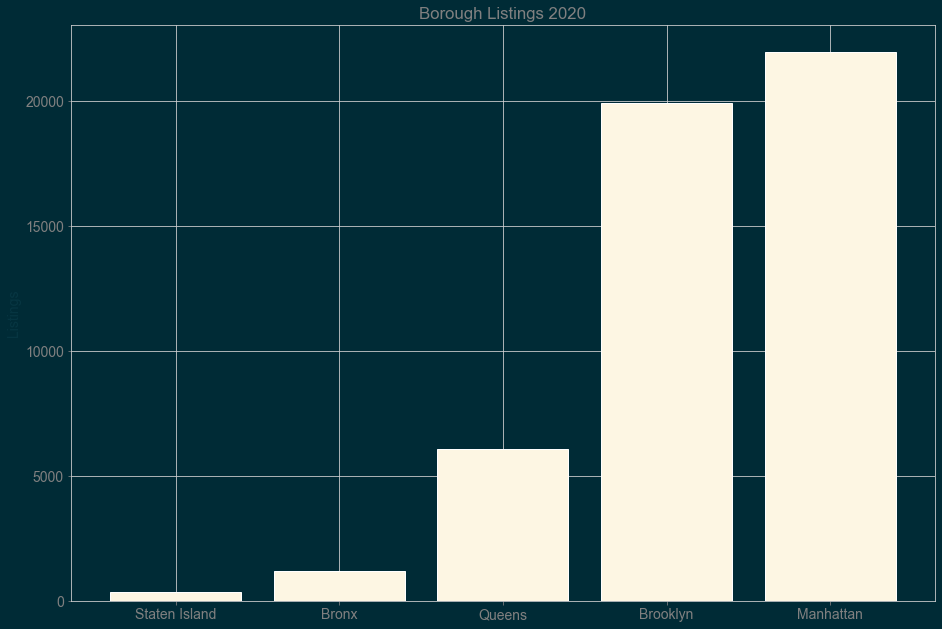

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Boroughs = ['Staten Island', 'Bronx', 'Queens', 'Brooklyn', 'Manhattan']
neighbourhood = borough_count20['neighbourhood']
ax.bar(Boroughs,neighbourhood)
ax.set_title('Borough Listings 2020')
ax.set_ylabel('Listings')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


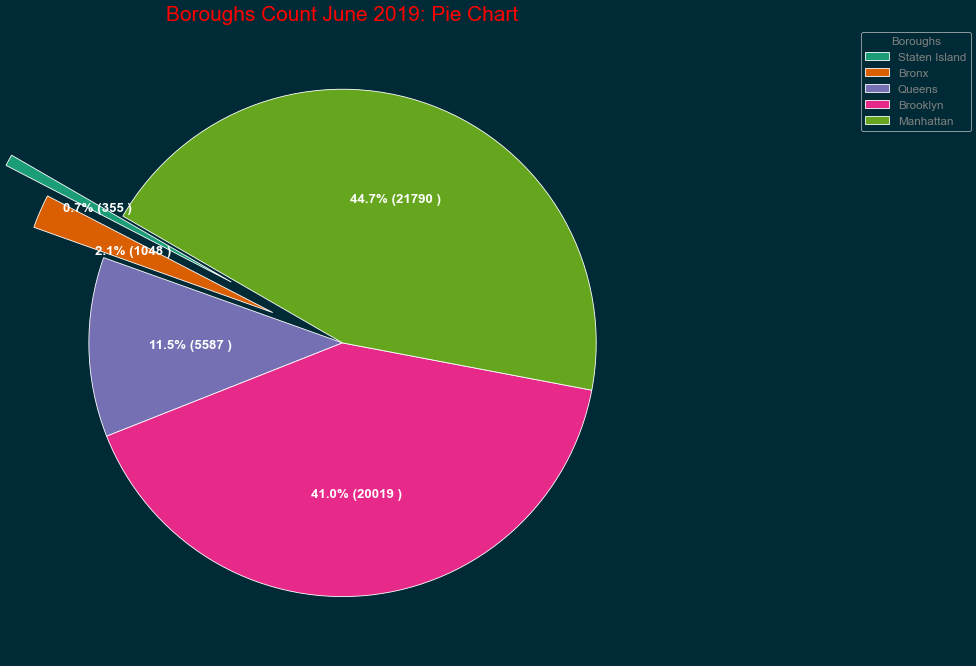

In [40]:
# Draw Plot
fig, ax = plt.subplots(figsize=(22, 14), subplot_kw=dict(aspect="equal"), dpi= 60)

data = borough_count19['neighbourhood']
Boroughs = ['Staten Island', 'Bronx', 'Queens', 'Brooklyn', 'Manhattan']
explode = [.5,.3,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=150,
                                 explode=explode)

# Decoration
ax.legend(wedges, Boroughs, title="Boroughs",  loc="left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=16, weight=1000)
ax.set_title("Boroughs Count June 2019: Pie Chart", size = 25, color= 'r')
plt.show()

**Avg Price of Listings per Boroughs**

In [41]:
borough_price_df19 = df[['neighbourhood_group', 'price']] 

In [42]:
avg_br_price_20  = borough_price_df19.groupby('neighbourhood_group').mean().sort_values(by = 'price').reset_index

In [43]:
borough_price_df20 = df1[['neighbourhood_group', 'price']] 

In [44]:
avg_br_price_20  = borough_price_df20.groupby('neighbourhood_group').mean().sort_values(by = 'price').reset_index

**Prices of Neighborhoods in Manhattan**

In [45]:
neigh_price_df19 = df[['neighbourhood_group', 'neighbourhood', 'price']]
Man_df19 = neigh_price_df19[neigh_price_df19['neighbourhood_group'] == 'Manhattan']
Man_price_avg19 = Man_df19.groupby('neighbourhood').mean().sort_values(by= 'price').reset_index()

In [46]:
neigh_price_df20 = df1[['neighbourhood_group', 'neighbourhood', 'price']]
Man_df20 = neigh_price_df20[neigh_price_df20['neighbourhood_group'] == 'Manhattan']
Man_price_avg20 = Man_df20.groupby('neighbourhood').mean().sort_values(by= 'price').reset_index()

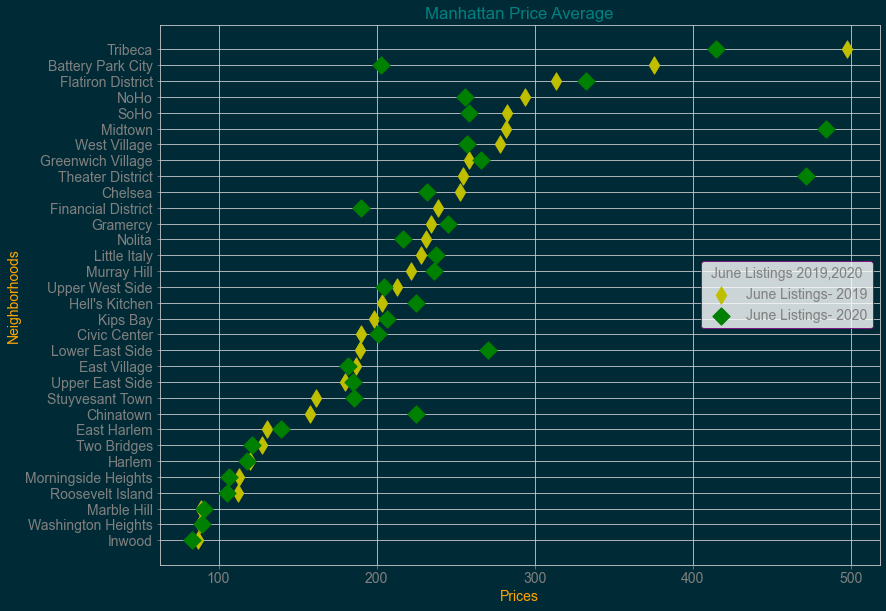

In [47]:
fig=plt.figure(figsize= (10,7.5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(data = Man_price_avg19, x =  'price', y = 'neighbourhood', marker= 'd', color= 'y', s = 150)
ax.scatter(data = Man_price_avg20, x =  'price', y = 'neighbourhood', marker= 'D', color= 'g', s = 150)
ax.plot()
plt.setp(autotexts, size=12, weight=900)
ax.set_xlabel('Prices', color= 'orange')
ax.set_ylabel('Neighborhoods',color='orange')
ax.set_title('Manhattan Price Average', color= 'teal')
ax.legend(title= 'June Listings 2019,2020', labels = ('June Listings- 2019', 'June Listings- 2020'), loc = 7, edgecolor= 'purple', facecolor= 'white')

**Count of Listings per Neighborhood**

In [48]:
Man_countdf_19 = Man_df19[['neighbourhood',]]
Man_countdf_19 = Man_countdf_19.reset_index()
Man_countdf_19 = Man_countdf_19.groupby('neighbourhood').count().sort_values('neighbourhood').reset_index()
Man_countdf_19 = Man_countdf_19.rename(columns= {'neighbourhood': 'neighbourhood', 'index': 'counts'})

In [49]:
Man_countdf_20 = Man_df20[['neighbourhood']]
Man_countdf_20 = Man_countdf_20.reset_index()
Man_countdf_20 = Man_countdf_20.groupby('neighbourhood').count().sort_values('neighbourhood').reset_index()
Man_countdf_20 = Man_countdf_20.rename(columns= {'neighbourhood': 'neighbourhood', 'index': 'counts'})

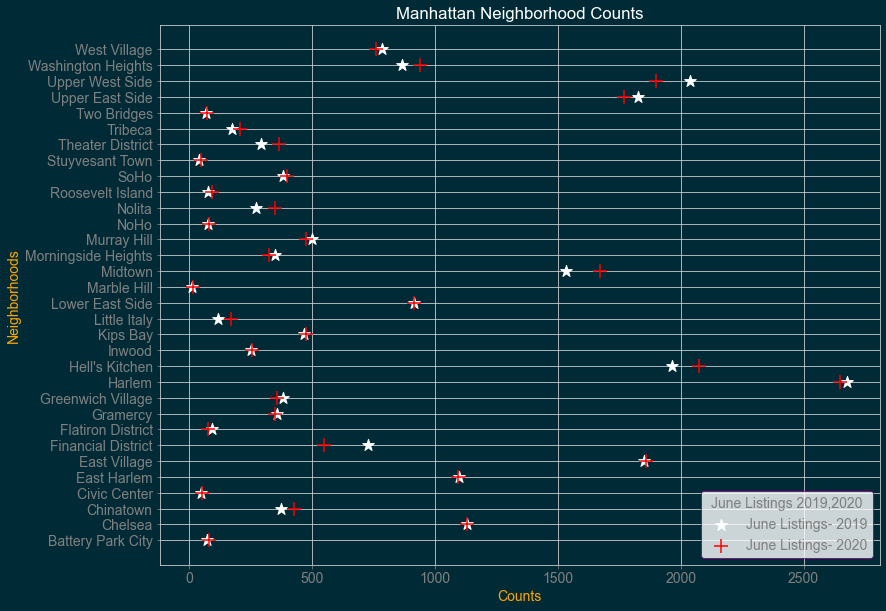

In [50]:
fig=plt.figure(figsize= (10,7.5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(data = Man_countdf_19, x =  'counts', y = 'neighbourhood', marker= '*', color= 'w', s = 150,)
ax.scatter(data = Man_countdf_20, x =  'counts', y = 'neighbourhood', marker= '+', color= 'r', s = 175)
ax.plot()
plt.setp(autotexts, size=12, weight=900)
ax.set_xlabel('Counts', color= 'orange')
ax.set_ylabel('Neighborhoods',color='orange')
ax.set_title('Manhattan Neighborhood Counts', color= 'w')
ax.legend(title= 'June Listings 2019,2020', labels = ('June Listings- 2019', 'June Listings- 2020'), loc = 4, edgecolor= 'purple', facecolor= 'white')

**Count Map**

In [51]:
man19 = df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','price','number_of_reviews']]
man19 = man19[man19['neighbourhood_group'] == 'Manhattan' ].reset_index()
mann =man19.groupby('neighbourhood').count().sort_values('neighbourhood')



In [55]:
man20 = df1[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','price','number_of_reviews']]
man20 = man20[man20['neighbourhood_group'] == 'Manhattan' ].reset_index().dropna()


tm = tm[['neighbourhood', 'year', 'price']].groupby(['neighbourhood', 'year']).mean().reset_index()

In [57]:
lst = ['SoHo', 'Harlem', 'Midtown', 'Financial District', 'Washington Heights', 'Battery Park City', 'Lower East Side']


tm.year = tm.year.map(lambda x: '2019' if x == 0 else '2020' )

ax1 = sns.pointplot(data = tm, x= 'year',y=  'price', hue='neighbourhood' )
fig, ax = plt.subplots(1,1,figsize=(18,14), dpi= 80), ax1

# Vertical Lines
ax.vlines(tm.year[0], ymin=0, ymax=325, color='black', alpha=0.7, linewidth=5, linestyles='dotted')
ax.vlines(tm.year[1], ymin=0, ymax=325, color='black', alpha=0.7, linewidth=5, linestyles='dotted')
ax.text(tm.year[0], 325, 'BEFORE', horizontalalignment='right', verticalalignment='center', color= 'w', fontdict={'size':16, 'weight':500})
ax.text(tm.year[1], 325, 'AFTER', horizontalalignment='left', verticalalignment='center', color= 'w', fontdict={'size':16, 'weight':500})
ax.set_title("Slopechart: Comparing Mean Price in June 2019 vs June 2020", fontdict={'size':22})
# ax.set(xlim=(0,1), ylim=(0,325), ylabel='Mean GDP Per Capita')

ax.legend(title="Neigbourhoods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_xlabel('Year', color= 'orange', size= 22)
ax.set_ylabel('Price',color='orange', size= 22)



In [56]:
man_map = folium.Map(location=[40.7831, -73.9712],zoom_start=13.5)
folium.TileLayer('stamenterrain').add_to(man_map)
mc = MarkerCluster()
for ind,row in man20.iterrows():
    mc.add_child(folium.CircleMarker(location=[row['latitude'],row['longitude']],
                        radius=1,color='#500cc'))
man_map.add_child(mc)
man_map

man_map.save('index.html')


### Hypothesis Test of Airbnb Mean Prices ###

**Null - The means of Airbnb Prices are equal in June 2019 and June 2020.**

**Alternate The mean price of Airbnb listing in June 2020 is higher than June 2019**

In [60]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [61]:

test_statistic = welch_test_statistic(man19['price'],man20['price'])
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -4.85


In [62]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df


In [63]:

df = welch_satterhwaithe_df(man19['price'], man20['price'])
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 32128.08


Text(0.5, 1.0, 'p-value Reigon')

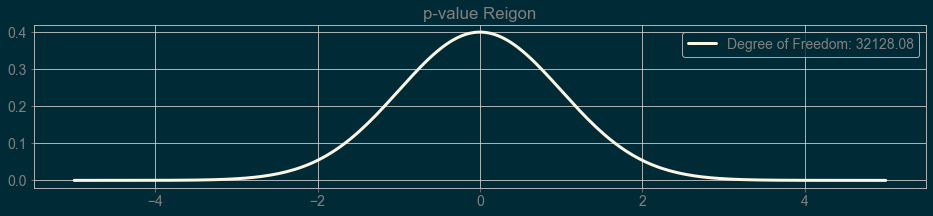

In [64]:
x = np.linspace(-5, 5, num=200)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=3, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="b", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [65]:
test_statistic, p_value = stats.ttest_ind(man19['price'], man20['price'], equal_var = False)
test_statistic_counts, p_value_counts = stats.ttest_ind(Man_countdf_19['counts'], Man_countdf_20['counts'], equal_var = False)
if p_value < .05:
    print(f"With a p-value of: {p_value:2.4} I reject the null hypothesis" )
else:
     print(f"With a p-value of: {p_value:2.4} I fail to reject the null hypothesis" )#place means and .std

With a p-value of: 1.216e-06 I reject the null hypothesis


### Hypothesis Test of Airbnb Mean listings ###


In [66]:
test_statistic_counts, p_value_counts = stats.ttest_ind(Man_countdf_19['counts'], Man_countdf_20['counts'], equal_var = False)
if p_value_counts < .05:
    print(f"With a p-value of: {p_value_counts:2.4} I  reject the null hypothesis" )
else:
     print(f"With a p-value of: {p_value_counts:2.4} I  fail to reject the null hypothesis" )

With a p-value of: 0.9761 I  fail to reject the null hypothesis


(0.0, 700.0)

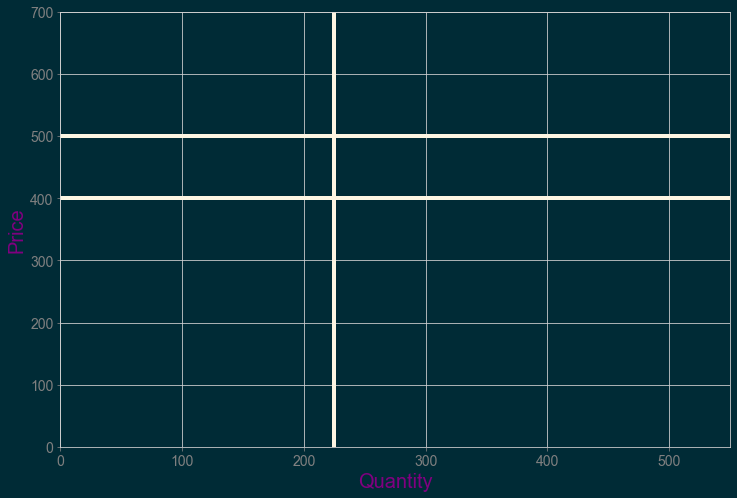

In [68]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 500)
x1 = np.linspace(0, 400)
y = np.linspace(500,0)
z = np.linspace(500,0)
ax.axhline(400,0, 1, linewidth=4)
ax.axhline(500,0, 1, linewidth=4)
ax.axvline(225, 0, 1, linewidth=4)


# ax.plot(x,x + 1, color="w", linewidth=4)
# ax.plot(y,x1, color = 'w', linewidth=4 )
# ax.plot(z,x, color = 'w', linewidth=4 )

ax.set_xlabel('Quantity', fontsize=20, color= 'purple')
ax.set_ylabel('Price', fontsize=20, color= 'purple')
ax.set_xlim(0, 550)
ax.set_ylim(0, 700)

**Regressions**

In [69]:
tot_man = df3[df3['neighbourhood_group'] == 'Manhattan']

In [70]:
tot_man = tot_man[tot_man['price'] < 4999]

In [71]:
tot_man = tot_man[tot_man['price'] != 0]

In [72]:
tot_man1 = pd.get_dummies(data = tot_man, columns = ['host_is_superhost', 'host_identity_verified', 'instant_bookable'])


In [73]:
tprice = tot_man1['price'] + tot_man1['cleaning_fee']

In [74]:
tot_man1['total_price'] = tprice

In [75]:
tot_man1['log_tprice'] = tot_man1['total_price'].map(np.log)

In [77]:
tot_man1.corr()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,number_of_reviews,review_scores_rating,year,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,total_price,log_tprice
host_response_rate,1.00000,0.04339,0.00248,-0.00102,-0.00319,0.02030,-0.02139,0.00428,0.01549,0.07106,0.06939,-0.05419,-0.17632,0.17632,0.01714,-0.01714,-0.06072,0.06072,-0.01683,-0.01042
host_total_listings_count,0.04339,1.00000,-0.01545,-0.00889,-0.05227,-0.02161,0.02699,0.22494,-0.02079,-0.10302,-0.01101,0.03569,0.03463,-0.03463,0.07229,-0.07229,-0.08979,0.08979,0.08712,0.12725
accommodates,0.00248,-0.01545,1.00000,0.42008,0.65142,0.74591,0.53733,0.44934,0.57363,-0.01428,-0.03333,0.03531,0.02692,-0.02692,0.05399,-0.05399,-0.10176,0.10176,0.58199,0.59865
bathrooms,-0.00102,-0.00889,0.42008,1.00000,0.47214,0.40335,0.40650,0.28337,0.27525,-0.06946,0.00122,0.02098,0.00798,-0.00798,0.05213,-0.05213,-0.04642,0.04642,0.42410,0.28783
bedrooms,-0.00319,-0.05227,0.65142,0.47214,1.00000,0.63047,0.45422,0.34657,0.41853,-0.02605,-0.00406,0.03169,-0.00406,0.00406,0.02987,-0.02987,-0.05644,0.05644,0.48245,0.40593
beds,0.02030,-0.02161,0.74591,0.40335,0.63047,1.00000,0.42216,0.36902,0.49081,-0.02128,-0.02880,0.04847,0.00448,-0.00448,0.04950,-0.04950,-0.07830,0.07830,0.46182,0.44725
price,-0.02139,0.02699,0.53733,0.40650,0.45422,0.42216,1.00000,0.42670,0.32744,-0.07981,0.02775,0.00953,0.01910,-0.01910,0.03814,-0.03814,-0.04220,0.04220,0.96596,0.74267
cleaning_fee,0.00428,0.22494,0.44934,0.28337,0.34657,0.36902,0.42670,1.00000,0.26043,-0.15419,0.00953,0.05797,0.01501,-0.01501,-0.00574,0.00574,0.04420,-0.04420,0.64613,0.73012
guests_included,0.01549,-0.02079,0.57363,0.27525,0.41853,0.49081,0.32744,0.26043,1.00000,0.03836,0.00331,0.00965,-0.02135,0.02135,0.00637,-0.00637,-0.07805,0.07805,0.35082,0.37711
number_of_reviews,0.07106,-0.10302,-0.01428,-0.06946,-0.02605,-0.02128,-0.07981,-0.15419,0.03836,1.00000,0.03615,0.05205,-0.19884,0.19884,-0.16820,0.16820,-0.03121,0.03121,-0.11146,-0.13018


In [78]:
tot_man1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16174 entries, 1 to 49487
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    16174 non-null  object 
 1   host_response_rate         16174 non-null  float64
 2   host_total_listings_count  16174 non-null  float64
 3   neighbourhood              16174 non-null  object 
 4   neighbourhood_group        16174 non-null  object 
 5   zipcode                    16174 non-null  object 
 6   latitude                   16174 non-null  object 
 7   longitude                  16174 non-null  object 
 8   property_type              16174 non-null  object 
 9   room_type                  16174 non-null  object 
 10  accommodates               16174 non-null  int64  
 11  bathrooms                  16174 non-null  float64
 12  bedrooms                   16174 non-null  float64
 13  beds                       16174 non-null  flo

In [318]:
X =  sm.add_constant(tot_man1.iloc[:,[2,10,11,16,17,18,19,21,23,25]])
y = tot_man1['total_price'] 
logy = np.log(y)
model1 = sm.OLS(logy,X).fit()
model1.summary(), model1.pvalues

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            total_price   R-squared:                       0.403
 Model:                            OLS   Adj. R-squared:                  0.402
 Method:                 Least Squares   F-statistic:                     1090.
 Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
 Time:                        13:43:42   Log-Likelihood:                -11616.
 No. Observations:               16174   AIC:                         2.325e+04
 Df Residuals:                   16163   BIC:                         2.334e+04
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------

Text(0.5, 1.0, 'Residual Plot for Log_tprice')

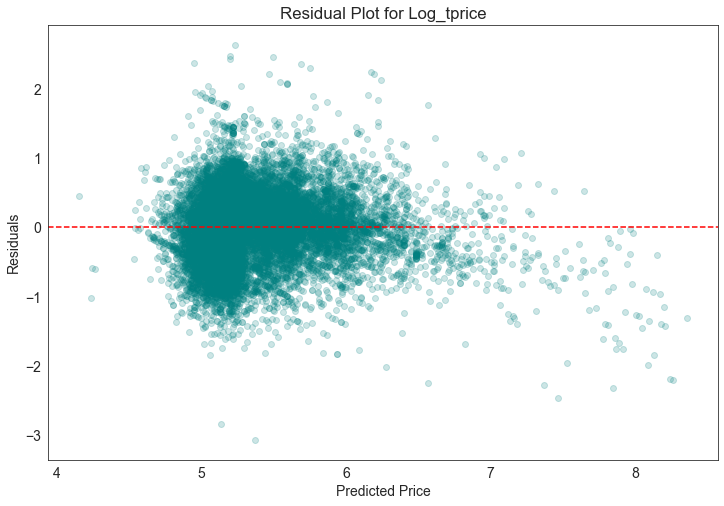

In [319]:
fig, ax = plt.subplots(figsize=(12,8))
predictions = model1.predict(X)
ax.scatter(predictions,
           logy - predictions,
           alpha=0.2, color ='teal')
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Residuals');
ax.set_title("Residual Plot for Log_tprice")

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Price')

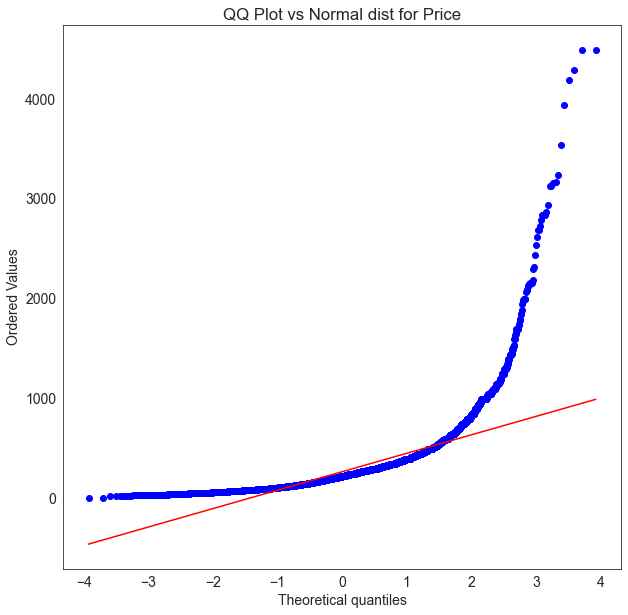

In [320]:
fig, ax = plt.subplots(figsize=((10, 10)))
predictions = model1.predict(X)
stats.probplot( y - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for Price")

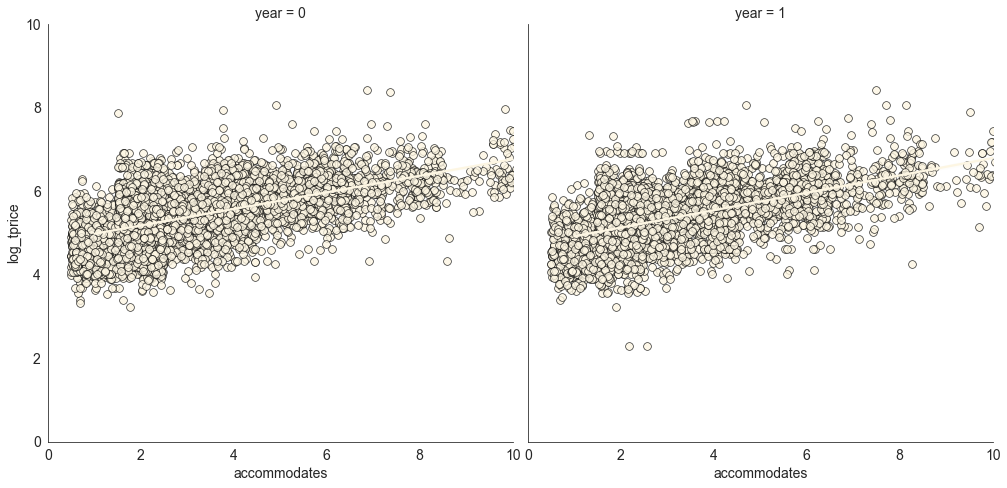

In [321]:
sns.set_style("white")
gridobj = sns.lmplot(x= 'accommodates', y= 'log_tprice',
                     data = tot_man1,
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="year",
                     x_jitter=.5,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0, 10), ylim=(0, 10))
plt.show()

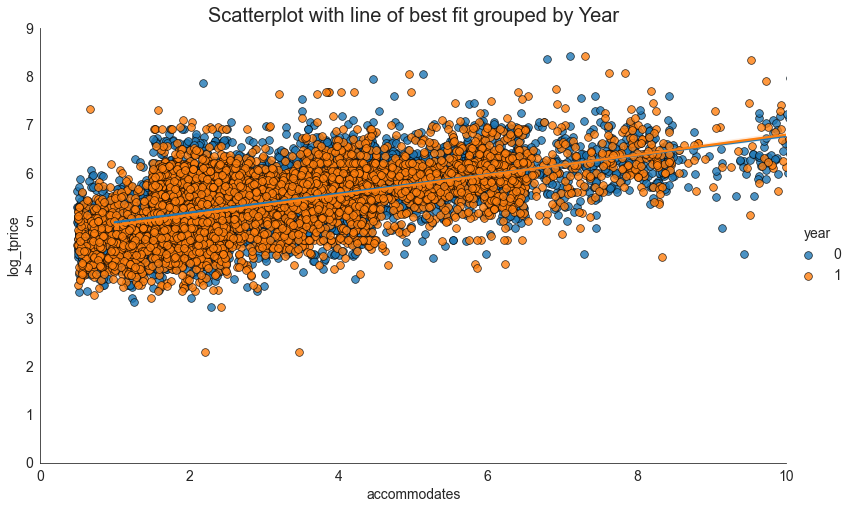

In [322]:
sns.set_style("white")
gridobj = sns.lmplot(x="accommodates", y="log_tprice", hue="year", data=tot_man1, 
                     height=7, aspect=1.6, robust=True, palette='tab10',x_jitter=.50,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0, 10), ylim=(0, 9))
plt.title("Scatterplot with line of best fit grouped by Year", fontsize=20)
plt.show()